In [2]:
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import mglearn

from sklearn.model_selection import train_test_split

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False #숫자 마이너스 부호 깨질 때 사용
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgunbd.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name) # font 깨져서 설정해주기

In [3]:
import pandas as pd 
data = pd.read_excel("C:/Users/HOME/Desktop/TSB/TSB/Untitled Folder/data/KCB_RANDOM_SAMPLE_SME_P_2018(200818) (1).xlsx", encoding="utf-8")

In [4]:
data 

,Unnamed: 0,자료 순번,연령대,B_AREA_CD_M,도시,시군구,자료추출기준일,신용평점,목적값,주거용부동산 보유여부,...,최초신용카드개설일자로부터경과일수[법인카드].1,1개월전(15일)카드일시불총이용금액[법인카드],1년내(15일)카드일시불최고총이용금액[법인카드],카드총이용잔액[법인카드],신용카드기관수[법인카드],소유 사업체 건수 (폐업제외),최초폐업일자로부터경과일수,사업자정보최초등록일자로부터경과일수,(추정) 월평균 연소득 1,사업시작월
0,0,10,30,44180,충청남도,보령시,20180630,917,0,0,...,0,0,0,0,0,1,-548,473,180,201703
1,1,490,50,41465,경기도,용인시 수지구,20180630,921,0,1,...,0,0,0,0,0,1,0,995,230,201510
2,2,970,50,41610,경기도,광주시,20180630,675,0,0,...,0,0,0,0,0,1,0,3866,220,200711
3,3,1210,50,42210,강원도,속초시,20180630,897,0,1,...,0,0,0,0,0,1,0,3866,330,200711
4,4,1450,40,41461,경기도,용인시 처인구,20180630,906,1,1,...,0,0,0,0,0,1,5594,3866,1100,200711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53922,53922,63299,50,43111,충청북도,청주시 상당구,20180630,701,0,0,...,963,0,0,0,1,1,0,960,240,201511
53923,53923,63539,50,41290,경기도,과천시,20180630,920,0,1,...,229,0,0,0,1,1,0,213,230,201711
53924,53924,63779,60,11710,서울특별시,송파구,20180630,908,0,1,...,461,3690,3750,3674,1,1,0,461,420,201703
53925,53925,64259,40,45140,전라북도,익산시,20180630,882,0,0,...,1329,212,814,293,1,1,0,3866,450,200711


In [5]:
data = data.drop(['Unnamed: 0'],axis=1) # 데이터 없는 열 삭제

In [6]:
# 필요한 독립변수와 종속변수 지정
data['목적값'] = data['목적값'].replace(2,1)

data_1 = data[['주거용부동산 보유여부', '월평균상환원금금액합계', 
               '평균부담대출이자율','월평균총신용카드이용금액','DTI','DSR',
               '저축은행업종대출총잔액(미해지)[기업여신]',
               '할부금융업종대출총기관수(미해지)[기업여신]','목적값']]


X = data_1[['주거용부동산 보유여부', '월평균상환원금금액합계', 
               '평균부담대출이자율','월평균총신용카드이용금액','DTI','DSR',
               '저축은행업종대출총잔액(미해지)[기업여신]',
               '할부금융업종대출총기관수(미해지)[기업여신]']]

y = data_1[['목적값']]

In [7]:
# 데이터 개수가 너무 작으니 smote로 늘려주기

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

sm = SMOTE()

# train 데이터를 넣어 복제함 
X, y = sm.fit_sample(X, y)


In [8]:
# data_1 에서 특성 표준화 _ 안할거면 취소하기 

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

fitted = std_scaler.fit(X)
output = std_scaler.transform(X)
X = pd.DataFrame(output, columns=X.columns, index=list(X.index.values))


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, stratify=y )

### 3. Modelling

#### 2) Decision Tree, Random Forest

In [10]:
from sklearn.tree import DecisionTreeClassifier 

decisiontree = DecisionTreeClassifier(random_state=2020)
model = decisiontree.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("Decision Tree")
print(confusion)


훈련 세트 점수: 0.996
테스트 세트 점수: 0.912
Decision Tree
[[11792  1364]
 [  948 12209]]


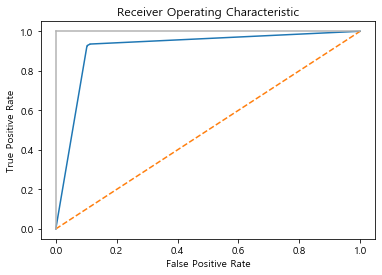

0.91554444750586

In [11]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 

model.fit(X_train, y_train)

# 예측 확률 계산
target_probabilities = model.predict_proba(X_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, 
                                                               target_probabilities)

# ROC 곡선 그리기 
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# roc 곡선 밑 계산 
roc_auc_score(y_test, target_probabilities)

In [12]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
model = randomforest.fit(X_train, y_train)

print("훈련 세트 점수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("RandomForest")
print(confusion)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


훈련 세트 점수: 0.996
테스트 세트 점수: 0.940
RandomForest
[[12025  1131]
 [  444 12713]]


In [13]:
randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state=0)

model_entropy = randomforest_entropy.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(model_entropy.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model_entropy.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model_entropy.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("RandomForest_entropy")
print(confusion)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


훈련 세트 점수: 0.996
테스트 세트 점수: 0.940
RandomForest_entropy
[[12003  1153]
 [  415 12742]]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


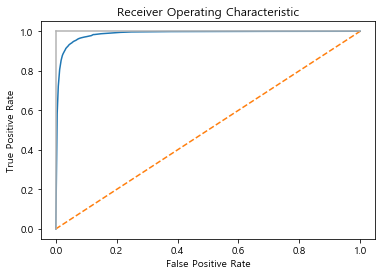

0.9864847720560169

In [14]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 

model_entropy.fit(X_train, y_train)

# 예측 확률 계산
target_probabilities = model_entropy.predict_proba(X_test)[:,1]

# 진짜 양성 비율과 거짓 양성 비율을 계산 
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, 
                                                               target_probabilities)

# ROC 곡선 그리기 
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0],[1,0], c=".7"), plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# roc 곡선 밑 계산 
roc_auc_score(y_test, target_probabilities)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [0,10,100,10^10], 'max_depth' : [8,80,8000,80000],
    'bootstrap':[False], 'n_estimators': [10,1000,10000], 'min_samples_split': [3],
    'criterion' : ["gini"],'class_weight' : ["balanced_subsample"]}
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

In [ ]:
# 정한 범위에서 그리드 탐색 결과 
# 범위 변경해줘도 상관없음 

grid_search.best_estimator_

In [ ]:
# 하지만 결과가 그리 좋지는 앟음 -> 차라리 그냥 돌리는게 나을정도로
# 다만 오버피팅을 막을 방법이 필요함 

randomforest_entropy = RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=8, min_samples_split=3, n_estimators=10)


model_entropy = randomforest_entropy.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(model_entropy.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(model_entropy.score(X_test, y_test)))

from sklearn.metrics import confusion_matrix


prediction =  model_entropy.predict(X_test)
confusion = confusion_matrix(y_true=y_test, y_pred=prediction)
print("RandomForest_entropy")
print(confusion)

실패. 정확도가 높게 나오면 안되는데 정확도가 너무 높게 나옴.<br>

1. 변수 선택<br>
변수선택방법중 단계별 선택을 선택해서 데이터 변수 50개 중 골라낸 후 상관계수가 그나마 높은 애들을 추려내긴 했지만 이들도 그닥 높진 않음 필요한 변수를 추려내는 과정에서 실패한 것 같다.<br>

2. 전처리<br>
추려내긴 했지만 눈에 띄는 데이터 이상치만 제거하고 돌렸기 때문에 크게 좋은 결과를 얻지 못했을 것 같다.<br>

3. 데이터<br>
데이터 두 개를 합쳐서 소상공인 신용평가 모형을 만들려고 했는데 두 데이터를 셔플링을 마구 해서 합칠 수 없는 데이터.<br>

3. 모델링<br>
프로젝트 중간에 팀이 해체되서 모델링을 4개밖에 못해서 아쉽다..xgboost는 워낙 성능이 좋지 않아서 생략<br>